In [10]:
# Load required libraries
library(ggplot2)
library(caret)

# Assuming the dataset is loaded into a data frame called `condo_data`
condo_data <- read.csv("/kaggle/input/raw-malaysian-housing-prices-data/houses.csv")


In [11]:
# Clean the data by handling missing values
condo_data_clean <- na.omit(condo_data)

In [12]:
condo_data_clean

,description,Bedroom,Bathroom,Property.Size,Nearby.School,Nearby.Mall,Ad.List,Category,Facilities,Building.Name,⋯,REN.Number,Bus.Stop,Mall,Park,School,Hospital,price,Highway,Nearby.Railway.Station,Railway.Station
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Iconic Building @ KL SETAPAK New launching & Latest condo !!!!! 🔥 House with luxury hotel concept 😍👑 💎 Freehold 🔑 Dual key 🛌 2 / 3 / 4 rooms 💰Affordable and Low entry price 💼 100% full furnish, move in with a luggage Whatsapp / Call Show contact number ( Eugine ) for more details & showroom viewing 🔥 Whatsapp / Call Show contact number ( Eugine ) for more details & showroom viewing 🔥 Whatsapp / Call Show contact number ( Eugine ) for more details & showroom viewing 🔥 Whatsapp link : https://hotnewcondo.wasap.my https://hotnewcondo.wasap.my https://hotnewcondo.wasap.my 🏝5 🌟 facilities : Sky lounge, Sky bridge, Sky garden 🚗 6km to KLCC/ Bkt Bintang 🍱 Food Heaven 📈 Freehold Appreciation 👑 Luxury Hotel Drop-off Lobby 🏊🏻 Infinity Pool 🏡 Sky Garden, Sky Lounge, Sky bridge Facilities: Level 10 – Elevated lawn for Yoga, Jogging Trail, Jacuzzi, Infinity Pool, Wading Pool, Pool Deck, Play land, Sunbathe Terrace, Sun Lounge, Gymnamsium, Viewing Deck, Squash, Futsal, Half Basketball court, central lobby and relaxing yard. Level 50 – Viewing Terrace, Barbeque area, Gathering space, Turf Mound, Multistep Seating Lounge, Rooftop Lounge and open stage. Whatsapp / Call Show contact number ( Eugine ) for more details & showroom viewing 🔥 Whatsapp / Call Show contact number ( Eugine ) for more details & showroom viewing 🔥 Whatsapp / Call Show contact number ( Eugine ) for more details & showroom viewing 🔥 Whatsapp link : https://hotnewcondo.wasap.my https://hotnewcondo.wasap.my https://hotnewcondo.wasap.my Continue Reading PROPERTY HIGHLIGHTS NEW! Bedroom 4 Bathroom 2 Property Size 1000 sq.ft. Nearby School Sekolah Menengah Pendidikan Khas Cacat Penglihatan Nearby Mall Setapak Central See more details",4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglihatan,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,⋯,-,Bus Stop Starparc Point Bus Stop Setapak Central Bus Stop Setapak Sentral (Opp) Bus Stop Columbia Hospital Bus Stop PV12 Residence Bus Stop PV15 Platinum Bus Stop PV12 Condominium (Opp) Bus Stop Sri Utama Schools (Opp) Bus Stop CIMB Genting Klang Bus Stop 1 Sri Utama Schools Bus Stop Aeon Big Danau Kota Bus Stop 2 Sri Utama Schools Bus Stop Setapak Commercial Bus Stop 1 Setapak Food Court Bus Stop Setapak Industrial Area Bus Stop 2 Setapak Food Court Bus Stop 2 Medan Makmur Setapak Bus Stop 1 Medan Makmur Setapak Bus Stop Langkawi Apartment (Opp) Bus Stop BHP Genting Klang Bus Stop Jalan Kilang Bus Stop PV128 Setapak,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala Lumpur, Malaysia Park at Taman Danau Kota, Setapak, Kuala Lumpur, Malaysia Park 1 at Setapak Garden, Setapak, Kuala Lumpur, Malaysia",Sekolah Menengah Pendidikan Khas Cacat Penglihatan Sekolah Kebangsaan Danau Kota SJK (C) Wangsa Maju Kolej Vokasional Setapak Sri Utama Schools SK Danau Kota (2) SMK Danau Kota,Columbia Asia Hospital,RM 340 000,,,
2,"FOR SALE @ RM250,000 Introduction: ~ Pangsapuri Kenanga @ Kampung Lapan ~ 980 sqft ~ 3 Bedrooms & 2 Bathrooms ~ Bathroom with Water Heather ~ Master Bedroom with Aircond ~ Walk Up Apartment ~ Bare Unit Facilities ~ Enter with access card ~ Swimming Pool ~ Nice environment Nearby: - Strategic Location - Jonker Walk, UNESCO World Heritage Site - Dataran Pahlawan - Hospital Mahkota - Kota Laksamana - Melaka Central (Bus Station) >>> https://www.youtube.com/@propertysoldier6688 >>> https://www.facebook.com/propertysoldiermelaka >>> You may call me up for other house inquiries, we have other houses ready for sale, Melaka Property Wanted For Sale: House, Apartment, Condominium, Shop, Factory, Land and etc. #Free Consultation Loan Service & Lawyer advis

In [13]:
# Ensure that the target variable (price) is numeric
condo_data_clean$price <- as.numeric(condo_data_clean$price)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [15]:
condo_data_clean <- condo_data_clean[!is.na(condo_data_clean$price) & !is.nan(condo_data_clean$price), ]


In [16]:
# Check if there are still missing or NaN values
if (any(is.na(condo_data_clean$price)) || any(is.nan(condo_data_clean$price))) {
  stop("There are still missing or NaN values in the price column. Please clean the data.")
}

In [18]:
print(dim(condo_data_clean))  # Check the number of rows and columns
print(summary(condo_data_clean$price))  # Check the summary of the price column


[1]  0 32
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                


In [8]:
# Split the data into training and testing sets
set.seed(123)
train_index <- createDataPartition(condo_data_clean$price, p = 0.8, list = FALSE)
train_data <- condo_data_clean[train_index, ]
test_data <- condo_data_clean[-train_index, ]

Warning message in createDataPartition(condo_data_clean$price, p = 0.8, list = FALSE):
“Some classes have a single record ( RM 1 009 000, RM 1 028 000, RM 1 030 000, RM 1 095 000, RM 1 190 000, RM 1 213 200, RM 1 220 000, RM 1 230 000, RM 1 239 000, RM 1 258 000, RM 1 312 000, RM 1 338 000, RM 1 399 000, RM 1 520 000, RM 1 540 000, RM 1 650 000, RM 1 750 000, RM 1 818 000, RM 1 870 000, RM 1 990 000, RM 102 000, RM 109 000, RM 113 400, RM 119 000, RM 124 999, RM 129 000, RM 133 000, RM 133 650, RM 139 999, RM 141 750, RM 142 000, RM 143 000, RM 149 000, RM 159 000, RM 163 000, RM 164 000, RM 169 999, RM 173 000, RM 179 500, RM 182 000, RM 184 000, RM 186 000, RM 189 000, RM 199 900, RM 199 990, RM 199 999, RM 2 080 000, RM 2 199 999, RM 2 200 000, RM 2 250 000, RM 2 280 000, RM 2 368 000, RM 2 500 000, RM 2 680 000, RM 2 700 000, RM 2 800 000, RM 200 200, RM 200 500, RM 206 000, RM 206 500, RM 207 000, RM 207 100, RM 209 999, RM 211 000, RM 218 700, RM 218 800, RM 219 999, RM 221 000, 

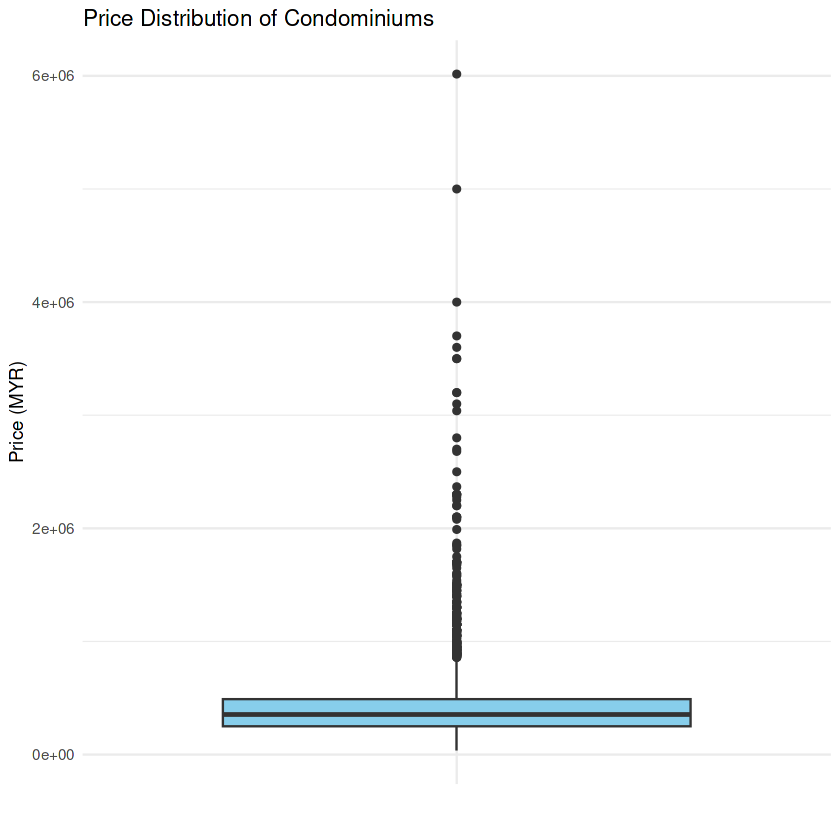

In [19]:
library(ggplot2)

# Load the dataset
data <- read.csv("/kaggle/input/raw-malaysian-housing-prices-data/houses.csv")

# Convert price to numeric (removing "RM" and commas)
data$price_numeric <- as.numeric(gsub("[^0-9]", "", data$price))

# Boxplot
ggplot(data, aes(x = "", y = price_numeric)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Price Distribution of Condominiums", y = "Price (MYR)", x = "") +
  theme_minimal()


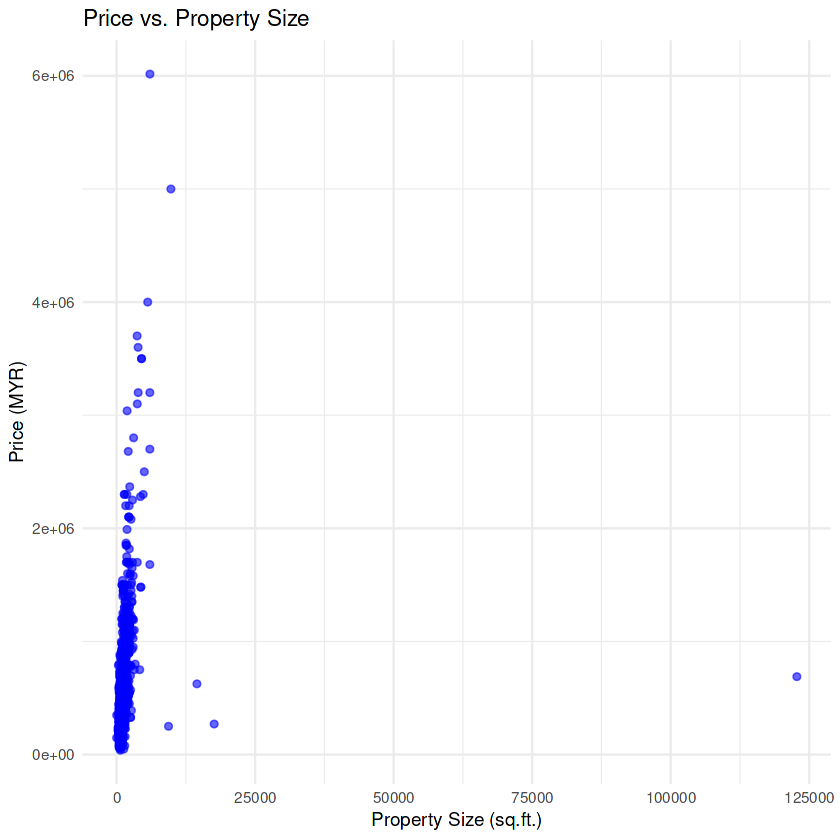

In [20]:
# Convert property size to numeric (removing "sq.ft." and non-numeric characters)
data$property_size_numeric <- as.numeric(gsub("[^0-9]", "", data$Property.Size))

# Scatter plot
ggplot(data, aes(x = property_size_numeric, y = price_numeric)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(title = "Price vs. Property Size", x = "Property Size (sq.ft.)", y = "Price (MYR)") +
  theme_minimal()


corrplot 0.92 loaded

Warning message in data.frame(price = data$price_numeric, bedrooms = as.numeric(data$Bedroom), :
“NAs introduced by coercion”
Warning message in data.frame(price = data$price_numeric, bedrooms = as.numeric(data$Bedroom), :
“NAs introduced by coercion”


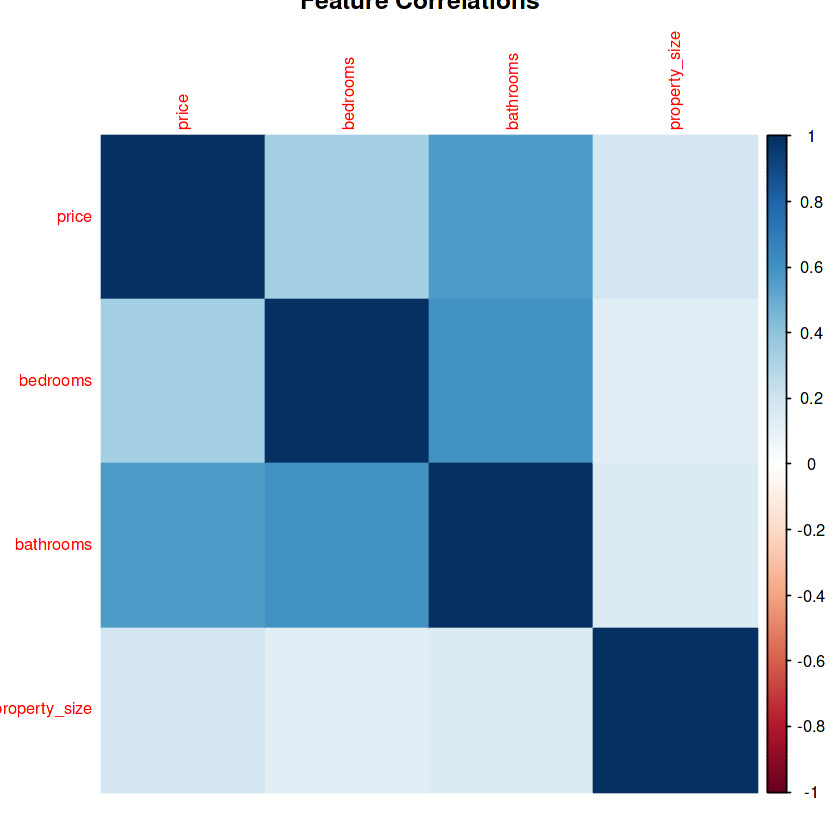

In [21]:
library(corrplot)

# Select numeric features
numeric_data <- data.frame(
  price = data$price_numeric,
  bedrooms = as.numeric(data$Bedroom),
  bathrooms = as.numeric(data$Bathroom),
  property_size = data$property_size_numeric
)

# Calculate correlation matrix
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Plot heatmap
corrplot(correlation_matrix, method = "color", title = "Feature Correlations", tl.cex = 0.8)


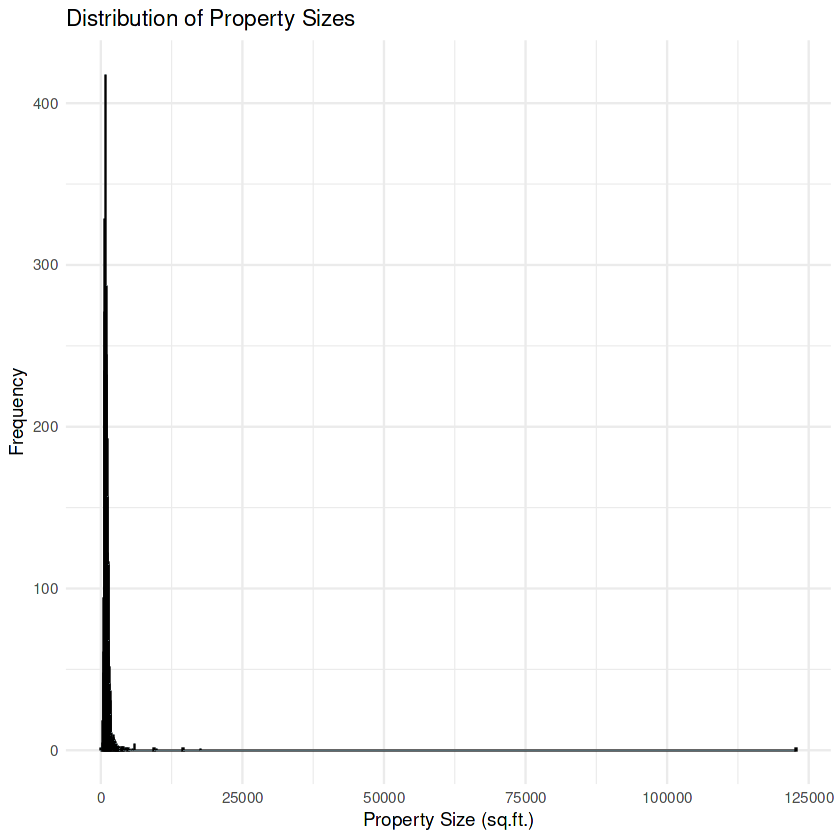

In [22]:
# Histogram for Property Sizes
ggplot(data, aes(x = property_size_numeric)) +
  geom_histogram(binwidth = 50, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Property Sizes", x = "Property Size (sq.ft.)", y = "Frequency") +
  theme_minimal()


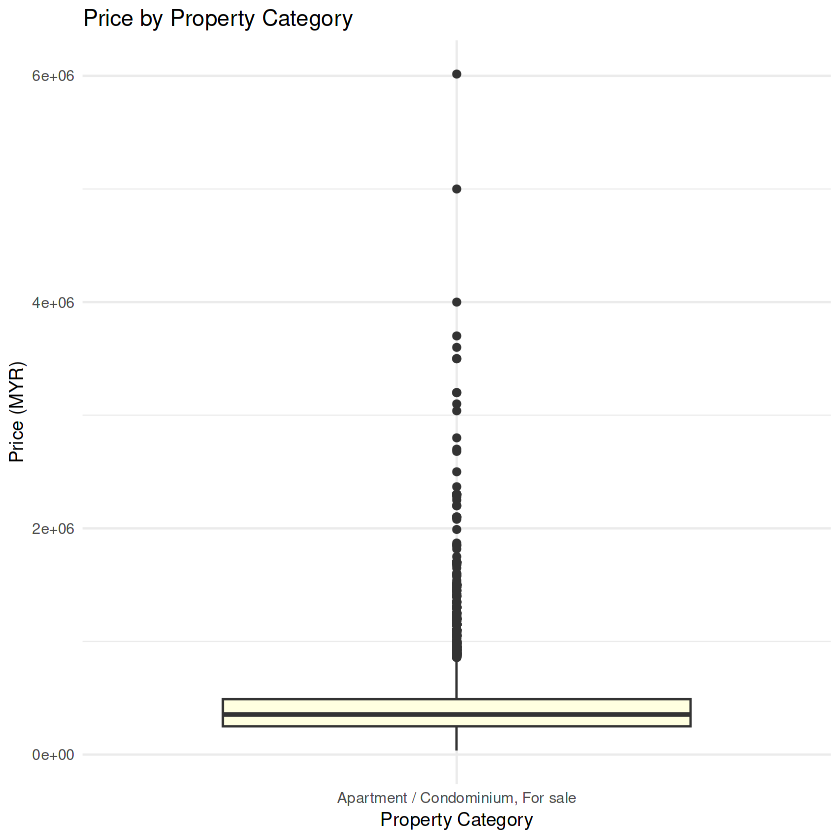

In [23]:
# Boxplot for Price by Property Category
ggplot(data, aes(x = Category, y = price_numeric)) +
  geom_boxplot(fill = "lightyellow") +
  labs(title = "Price by Property Category", x = "Property Category", y = "Price (MYR)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()
